# 1. Eksplorasi dan Visualisasi data 

In [3]:
#import modules yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load dataset
df = pd.read_csv("loan.csv")
print(df.shape)
df.head(5)

C:\Users\user only\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#meihat kolom yang ada
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [23]:
#membedakan numerik kolom dengan kategorik kolom
numcols = ['loan_amnt', 'int_rate', 'installment']
catcols = ['term', 'grade', 'sub_grade']

In [24]:
#data baru(menggabungkan numerik dan kategorik kolom)
data = df[numcols+catcols]

In [25]:
data.head(5)

,loan_amnt,int_rate,installment,term,grade,sub_grade
0,2500,13.56,84.92,36 months,C,C1
1,30000,18.94,777.23,60 months,D,D2
2,5000,17.97,180.69,36 months,D,D1
3,4000,18.94,146.51,36 months,D,D2
4,30000,16.14,731.78,60 months,C,C4


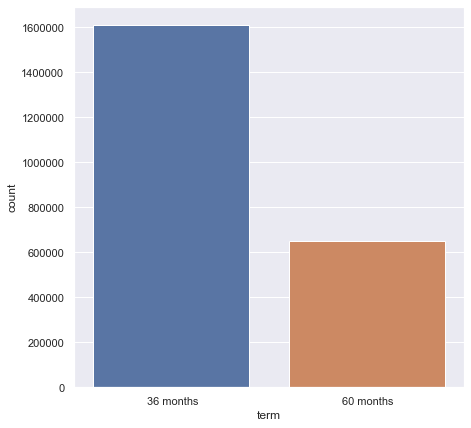

In [26]:
#melihat term distribusi
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x="term", data=data)

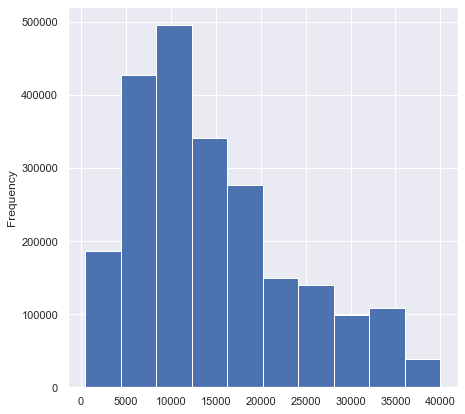

In [27]:
#melihat loan_amnt distribusi
data["loan_amnt"].plot.hist()

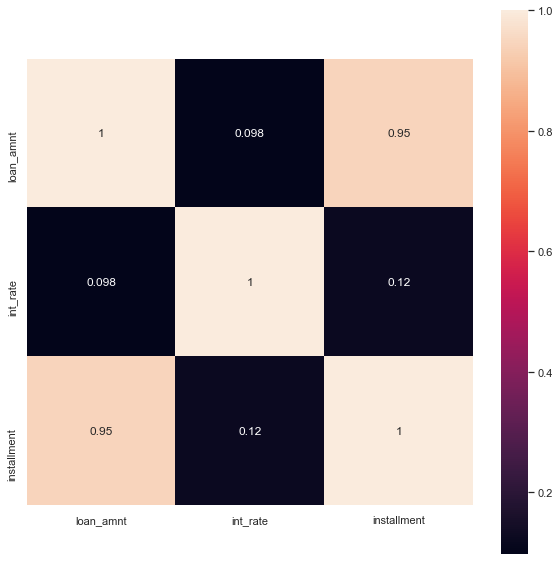

In [28]:
#tabel korelasi untuk melihat fiture mana yg berkorelasi tinggi untuk dibuat prediksi
correlation = data.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, vmax = 1, square = True, annot = True)

In [31]:
#deskripsi data
data.describe()

,loan_amnt,int_rate,installment
count,2.260668e+06,2.260668e+06,2.260668e+06
mean,1.504693e+04,1.309291e+01,4.458076e+02
std,9.190245e+03,4.832114e+00,2.671737e+02
min,5.000000e+02,5.310000e+00,4.930000e+00
25%,8.000000e+03,9.490000e+00,2.516500e+02
50%,1.290000e+04,1.262000e+01,3.779900e+02
75%,2.000000e+04,1.599000e+01,5.933200e+02
max,4.000000e+04,3.099000e+01,1.719830e+03


In [32]:
#menentukan X dan Y untuk diprediksi
#disini saya memprediksi loan_amnt menggunakan feature installment karena didapat hasil yang tinggi di tabel korelasi
#saya membedakan loan_amount menjadi 2 yaitu tinggi dan rendah
Y = data['loan_amnt']>=1.290000e+04
X = data.copy()
del X['loan_amnt']
len(X.columns)

5

In [33]:
print(len(X))
print(len(Y))

2260668
2260668


In [34]:
#menghilangkan NaN
data = data.dropna()

In [36]:
data.shape

(2260668, 6)

In [37]:
#Split-out validation dataset
from sklearn.model_selection import train_test_split

X = data.iloc[:,2:3]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [38]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, random_state = seed)
kfold

KFold(n_splits=10, random_state=7, shuffle=False)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv_logistic_reg = cross_val_score(LogisticRegression(),
                                 X_train, Y_train, cv=kfold, scoring = 'accuracy')

C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

In [40]:
cv_logistic_reg

array([0.91968107, 0.92123481, 0.92078693, 0.92027271, 0.92072567,
       0.91971933, 0.92074226, 0.92005109, 0.92009533, 0.92041603])

In [41]:
#Spot-Check Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))

#evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy' )
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user only\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

LR: 0.920373 (0.000477)
LDA: 0.910852 (0.000571)
KNN: 0.977253 (0.000422)


In [43]:
#Membuat predictions di validation dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#saya menggunakan KNN untuk prediksi karena akurasinya adalah yang paling tinggi
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9773385766166668
[[220954   5054]
 [  5192 220934]]
              precision    recall  f1-score   support

       False       0.98      0.98      0.98    226008
        True       0.98      0.98      0.98    226126

    accuracy                           0.98    452134
   macro avg       0.98      0.98      0.98    452134
weighted avg       0.98      0.98      0.98    452134



In [44]:
hasil = X_validation
hasil["label_predict"] = predictions
hasil["actual_label"] = Y_validation
hasil[hasil["label_predict"] != hasil["actual_label"]]

C:\Users\user only\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user only\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,installment,label_predict,actual_label
1508365,443.64,True,False
1655264,479.56,True,False
2102565,364.62,False,True
2054310,430.07,False,True
664318,395.18,True,False
1130101,330.92,True,False
1640084,517.36,True,False
37352,326.07,True,False
1486063,450.46,True,False
799839,317.69,False,True


In [45]:
#Hasil prediksi menggunakan KNN
hasil.head(5)

,installment,label_predict,actual_label
766371,453.84,True,True
1508365,443.64,True,False
581126,508.73,True,True
2042153,639.50,True,True
1110095,643.32,True,True


# 2. Saran teknis untuk analis data adalah menggunakan prediction untuk mengantisipasi permasalahan yang akan datang

# 3. Analisis ini menggunakan tools jupyter notebook